In [135]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
from sympy import *
x = symbols('x')
f = (x**3)*sin(4*x)            #sample function
fx = integrate(f, (x, 1, 7))   #sample function integrated from 1 to 7
floatfx = float(fx)

In [106]:
def mcintegrate(a, b, n, func):
    np.random.seed(1)
    i = 0
    sum = 0
    while (i < n):
        r = np.random.rand()*(b-a) + a
        y = func.subs(x, r)
        sum = sum + y.evalf()
        i = i+1
    return((b-a)*sum/n)

The function mcintegrate runs slowly because I used sympy within it, but should allow it to find the solution to any sympy function.

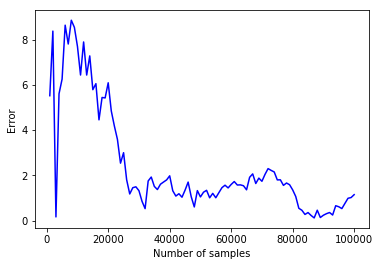

In [143]:
i = 1000
res = np.empty(shape=(100, 2))
while (i<100001):
    t = mcintegrate(1, 7, i, f)
    t = abs(floatfx-t)
    res[int(i/1000-1)] = [i, t]
    i = i+1000
plt.plot(res[0:,0], res[0:,1], 'b-')
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

Because the Monte Carlo method requires such high iterations to get reasonable accuracy, a hard-coded mcintegrate would have been much more time efficient.

In previous versions of the notebook I ran the loop and plot with fewer iterations to test accuracy under different conditions but those cells were removed.